In [1]:
from argparse import Namespace

import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm

from generate import generate
from modularity import modularity

In [2]:
args = Namespace()
args.n_users = 10000
args.n_ctgrs = 100
args.n_items_per_ctgr = 100
args.n_sesses = 10
args.n_items_per_sess = 10

In [3]:
linspace = np.linspace(0, 1, 10)
accuracies = []
modularities = []
for p_div in tqdm(linspace):
    [uid, iid], [sess_uids, sess_iids] = generate(p_div=p_div, **vars(args))

    df = pd.DataFrame(data={'uid' : sess_uids[0], 'iid' : sess_iids[0]}).set_index('uid')

    edges = df.join(df, on='uid', how='inner', lsuffix='_src', rsuffix='_dst')

    src = np.array(edges.iid_src)
    dst = np.array(edges.iid_dst)

    accuracies.append(np.sum(src // args.n_items_per_ctgr == dst // args.n_items_per_ctgr) / len(src))

    nodes = np.arange(max(np.max(src), np.max(dst)) + 1)
    y = nodes // args.n_items_per_ctgr
    modularities.append(modularity(src, dst, y))

100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


Text(0, 0.5, 'ratio of inter-category edges')

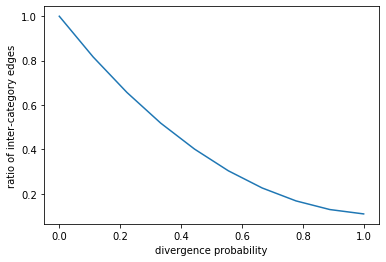

In [4]:
pl.plot(linspace, accuracies)
pl.xlabel('divergence probability')
pl.ylabel('ratio of inter-category edges')

Text(0, 0.5, 'modularity')

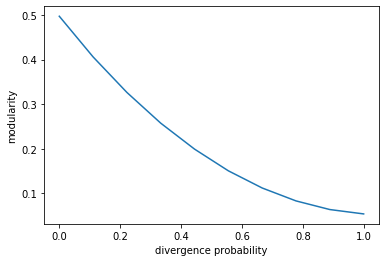

In [5]:
pl.plot(linspace, modularities)
pl.xlabel('divergence probability')
pl.ylabel('modularity')